In [1]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
# from nodes.HR import HR
from nodes.HH import HH
from connect.ws_small_world import create_sw
# from synapse.synapse import synbase
from utils.statis import cal_cv, cal_synFactor
from utils.utils import spikevent, delayer
from utils.utils_plot import plot_firing_raster

from synapse.synapse_ds import synbase_ds
from synapse.synapse_ds import syn_delay_stdp_ds

In [2]:
seed = 0
np.random.seed(seed)                # 给numpy设置随机种子

# 测试 synbase_ds程序

In [3]:
N = 1
pre = HH(N=N)
post = pre
pre.Iex = 0
syn = synbase_ds(pre, post, conn=np.zeros((1,1)))

In [4]:
s = []
men =[]
time =[]
for i in range(10000):
    Io = 0
    if i==2000:
        Io = 1000
    if i==4000:
        Io = 1000
    pre(Io)
    syn()
    men.append(pre.mem.copy())
    s.append(syn.s.copy())
    time.append(pre.t)

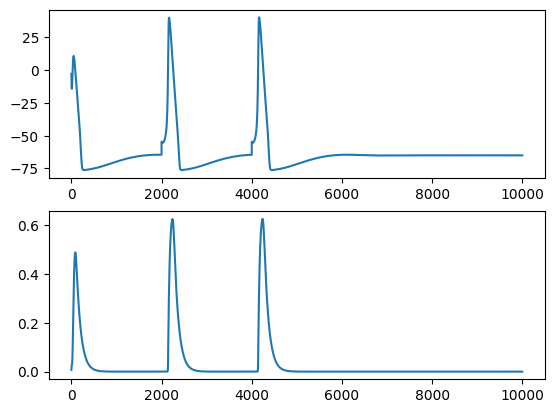

In [5]:
plt.subplot(2, 1, 1)
plt.plot(range(len(men)),men)
plt.subplot(2, 1, 2)
plt.plot(range(len(s)), s)
plt.show()

# 测试 syn_delay_stdp_ds程序

In [6]:
N = 1
dt = 0.01
method = "euler"
# conn = create_sw(N, 2, 0.5)
conn = np.ones((1,1), dtype=int)

In [7]:
delta_t_list = np.arange(-60, 60, 10)
# delta_t_list = [-10]
Ipre_t = np.arange(100, 1000, 200, dtype=int)*100
w_end = []

In [8]:
for delta_t in delta_t_list:
    delta_t = int(delta_t*100)
    pre = HH(N=N, method=method, dt=dt)
    delayer1 = delayer(N, 0)
    post = HH(N=N, method=method, dt=dt)
    pre.Iex = 0
    post.Iex = 0
    syn = syn_delay_stdp_ds(pre, post, conn=conn, delayer=delayer1)
    syn.lr = .3
    w_init = syn.w.copy()

    # 初始化神经元
    for i in range(10000):
        pre()
        post()

    Ipost_t = Ipre_t+delta_t

    for i in range(150000):
        pre.Iex = 0
        post.Iex = 0
        if i in Ipre_t:
            pre.Iex = 1000
        if i in Ipost_t:
            post.Iex = 1000
        Isyn = syn()
        pre()
        post()

    w_end.append(syn.w[0,0])

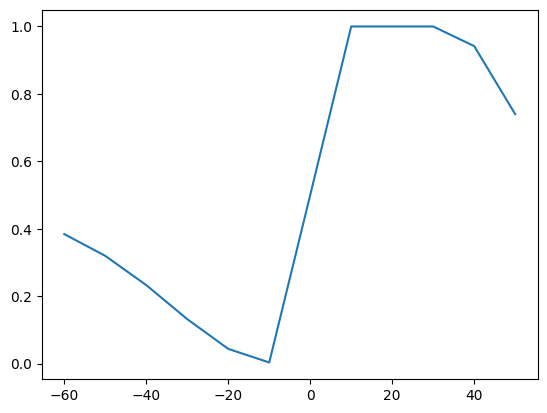

In [ ]:
plt.plot(delta_t_list, w_end)